<a href="https://colab.research.google.com/github/TomiGarrido/MAT281-Entegrables/blob/main/docs/codes/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# FIXME

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [7]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [9]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [10]:
print("La distribución de los datos es:")
display(digits.describe())

print("\nLa memoria que se utilizó fue:")
display(digits.info(memory_usage='deep'))

print("\nLos tipos de datos observados son:")
display(digits.dtypes)

print("\nLos registros por clase son:")
display(digits['target'].value_counts().sort_index())

print("\nVerificación de rangos de valores:")
print(f"Rango de valores de píxel: min={digits.drop(columns='target').values.min()}, max={digits.drop(columns='target').values.max()}")
print(f"Rango de valores del target: min={digits['target'].values.min()}, max={digits['target'].values.max()}")

La distribución de los datos es:


,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000



La memoria que se utilizó fue:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non

None


Los tipos de datos observados son:


,0
c00,int64
c01,int64
c02,int64
c03,int64
c04,int64
...,...
c60,int64
c61,int64
c62,int64
c63,int64



Los registros por clase son:


,count
target,
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174



Verificación de rangos de valores:
Rango de valores de píxel: min=0, max=16
Rango de valores del target: min=0, max=9


REPUESTA:
Los datos se distribuyen de una manera relativamente uniforme.

Se usó 912.7KB de memoria.

Se aprecian datos de tipo int64

En la tabla "Registro de clases" se puede obervar la cantidad de registros por clase.

Notar que los rangos de valores se mantienen entre 0-16 y 0-9 para los pixeles y targets respectivamente. Coincide con la descripción inicial y no hay valores inconsistentes en los rangos

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [11]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

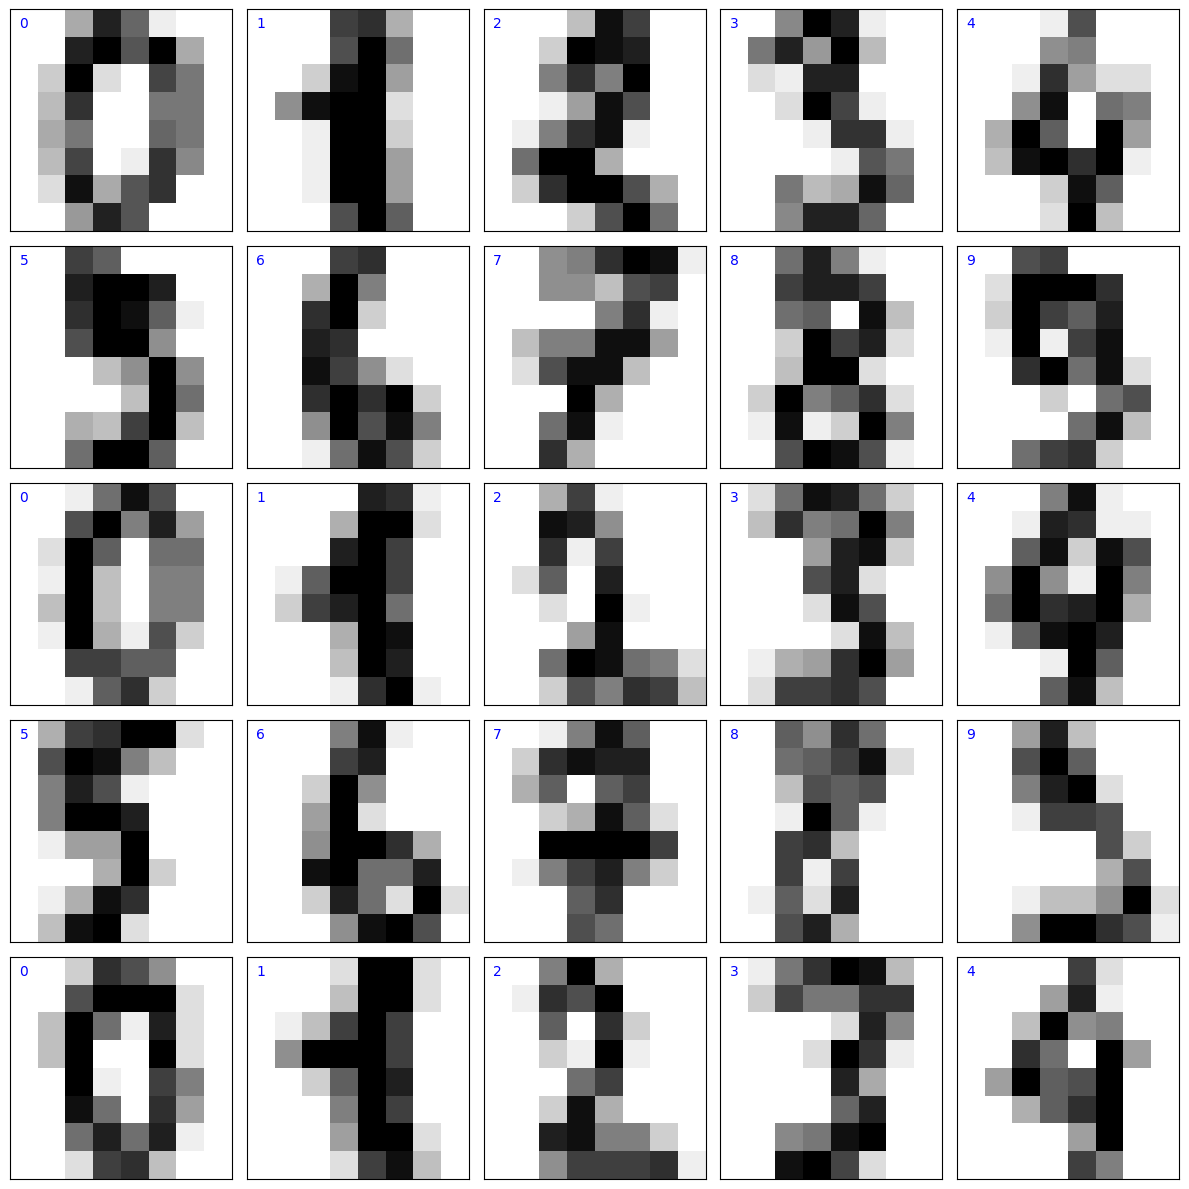

In [12]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for i in range(nx * ny):
    row = i // ny
    col = i % ny
    axs[row, col].imshow(digits_dict["images"][i], cmap='gray_r')
    axs[row, col].text(0, 0, str(digits_dict["target"][i]), horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
    axs[row, col].get_xaxis().set_visible(False)
    axs[row, col].get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [13]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

Largo del conjunto de entrenamiento: 1437
Largo del conjunto de testeo: 360

Entrenando Regresión Logística...
Métricas para Regresión Logística:
Accuracy: 0.9750
Precision: 0.9767
Recall: 0.9765
F1-score: 0.9765


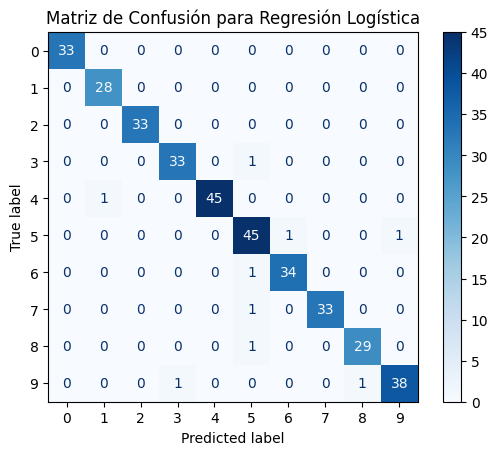


Entrenando K-Neighbors Classifier...
Métricas para K-Neighbors Classifier:
Accuracy: 0.9861
Precision: 0.9879
Recall: 0.9878
F1-score: 0.9878


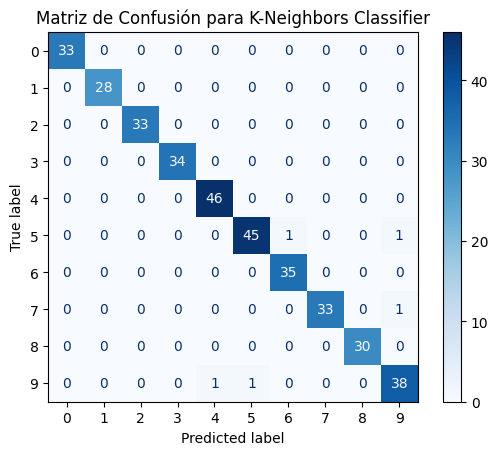


Entrenando Suport Vector Machine...
Métricas para Suport Vector Machine:
Accuracy: 0.9861
Precision: 0.9872
Recall: 0.9866
F1-score: 0.9868


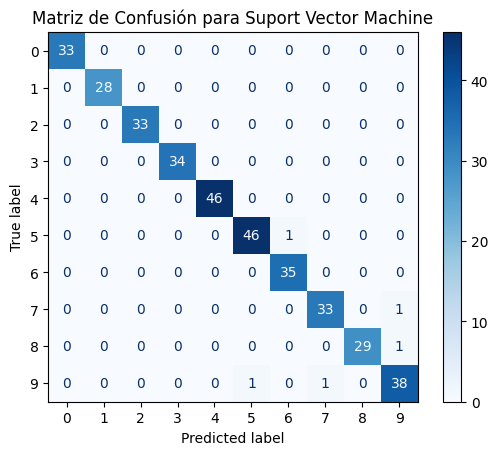


Análisis de Modelos:

Regresión Logística
Accuracy: 0.9750
Precision: 0.9767
Recall: 0.9765
F1-score: 0.9765

K-Neighbors Classifier
Accuracy: 0.9861
Precision: 0.9879
Recall: 0.9878
F1-score: 0.9878

Suport Vector Machine
Accuracy: 0.9861
Precision: 0.9872
Recall: 0.9866
F1-score: 0.9868


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = digits.drop(columns="target").values
y = digits["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Largo del conjunto de entrenamiento: {len(X_train)}")
print(f"Largo del conjunto de testeo: {len(X_test)}")

logistic_regression_model = LogisticRegression(max_iter=10000)
knn_model = KNeighborsClassifier()
svm_model = SVC()
models = {
    "Regresión Logística": logistic_regression_model,
    "K-Neighbors Classifier": knn_model,
    "Suport Vector Machine": svm_model
}

results = {}

for name, model in models.items():
    print(f"\nEntrenando {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Confusion Matrix": cm
    }

    print(f"Métricas para {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits_dict["target_names"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión para {name}")
    plt.show()

print("\nAnálisis de Modelos:")
best_model = None
best_accuracy = 0

for name, metrics in results.items():
    print(f"\n{name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")

    if metrics["Accuracy"] > best_accuracy:
        best_accuracy = metrics["Accuracy"]
        best_model = name

RESPUESTA:
El modelo que se basa de mejor manera en "Accuracy" es K-Neighbors Classifier, pues posee el valor que más se acerca a 1, este siendo de 0.9861.

El modelo que demora menos en ajustarse es K-Neighbors Classifier

Si se trata de "Accuracy" o "Precisión", el modelo a escoger sería K-Neighbors Classifier, pero depende de muchos otros factores tales como la cantidad de datos que se le proporcione al modelo o la intepretabilidad de los datos.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

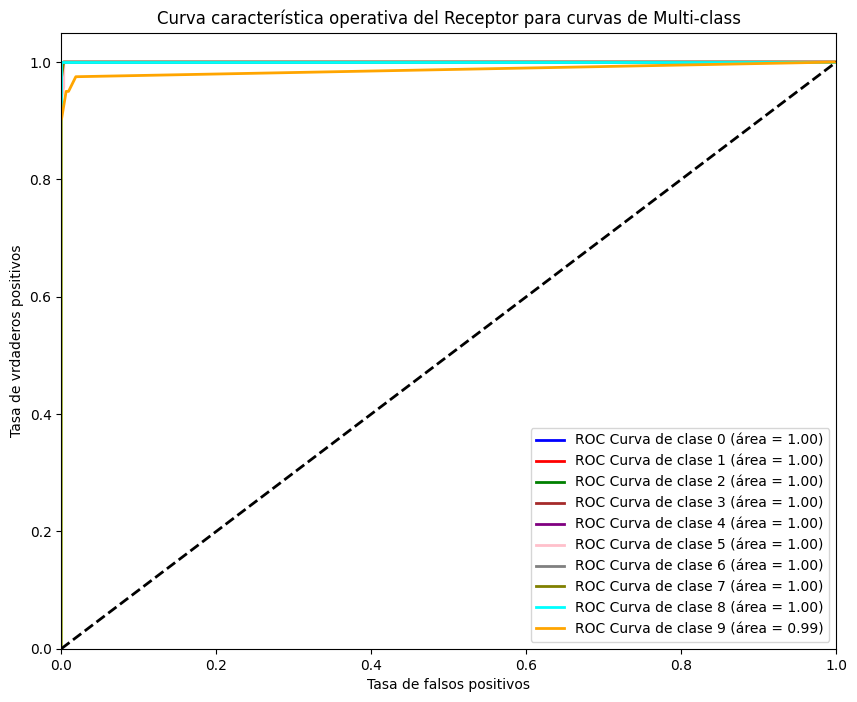

In [15]:
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

best_model = KNeighborsClassifier()
y_bin = label_binarize(y, classes=np.arange(10))
n_classes = y_bin.shape[1]

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)
classifier = OneVsRestClassifier(best_model)
classifier.fit(X_train_bin, y_train_bin)
y_score = classifier.predict_proba(X_test_bin)

fpr = dict()
tpl = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpl[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpl[i])

plt.figure(figsize=(10, 8))
colors = cycle(["blue", "red", "green", "brown", "purple", "pink", "gray", "olive", "cyan", "orange"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpl[i], color=color, lw=2,
             label="ROC Curva de clase {0} (área = {1:0.2f})".format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de vrdaderos positivos")
plt.title("Curva característica operativa del Receptor para curvas de Multi-class")
plt.legend(loc="lower right")
plt.show()

RESPUESTA:
Notemos que el área bajo la curva es casi perfecta, es decir, el rendimiento del clasificador K-Neighbors Classificator es casi perfecto (en el sentido que es muy preciso). Por el otro lado, 9 de las 10 clases tuvieron un AUC igual a 1, mientras que uno de ellos es 0.99. Esto quiere decir que el clasificador es capaz como casi ningún error.

Con esto concluimos que el clasificador K-Neighbors Classifier posee un rendimiento casi perfecto (mayoría con AUC=1) pero deberevisarse igual en caso de que hayan pequeños imperfectos.


### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [16]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

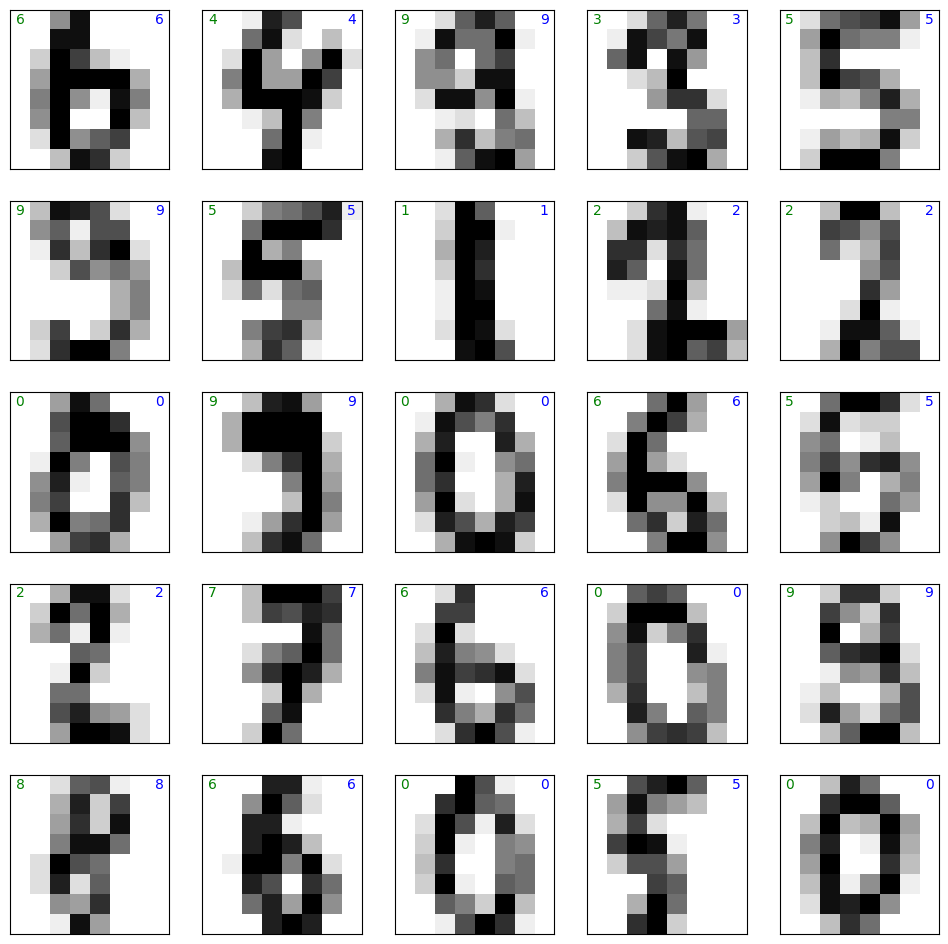

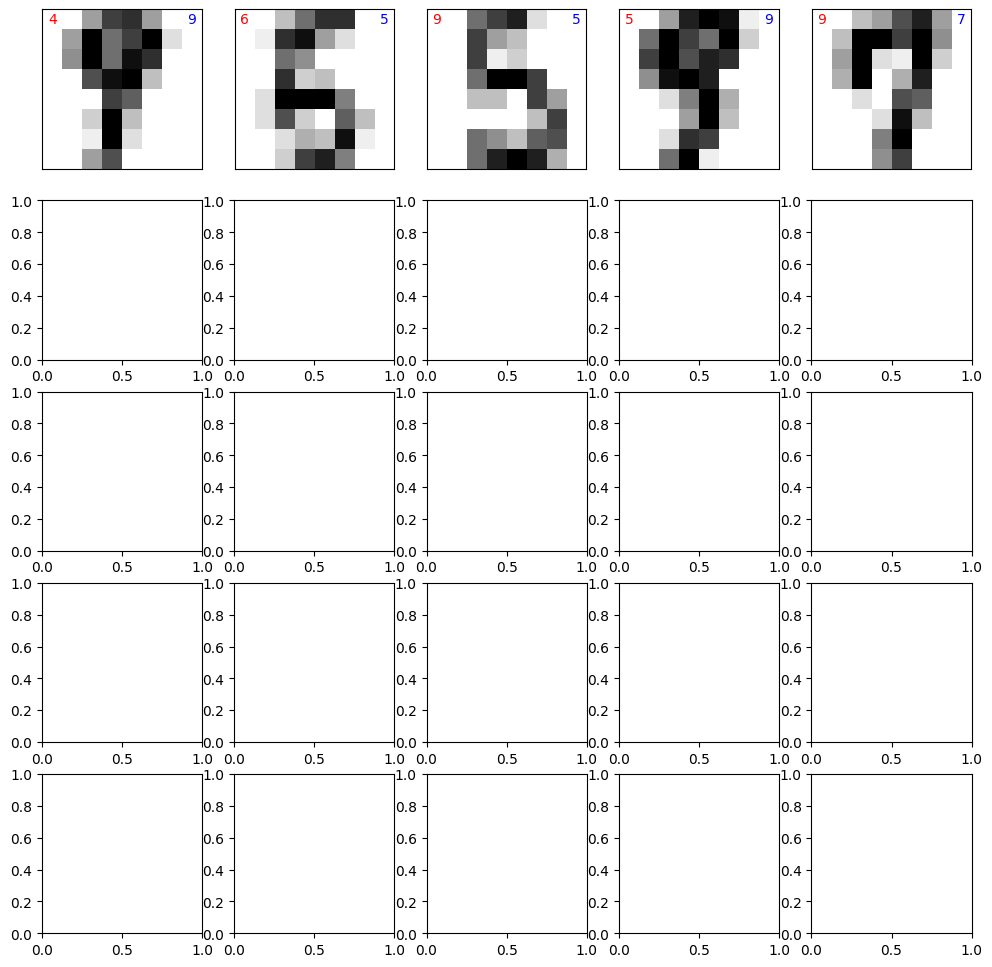

In [17]:
# Visualizar resultados correctos
mostrar_resultados(digits, KNeighborsClassifier(), label="correctos")

# Visualizar resultados incorrectos
mostrar_resultados(digits, KNeighborsClassifier(), label="incorrectos")

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

RESPUESTA:

# **Definición del problema**

El objetivo de la regresión es predecir el valor medio de las propiedades en un distrito específico de California utilizando características proporcionadas por datos del censo de 1990. Por el otro lado, el objetivo de la sección de clasificación es predecir dígitos escritos a mano a partir de los datos disponibles, realizando machine learning que incluye exploración, visualización y procesamiento previo de datos.

# **Estadística descriptiva**

Para la clasificación de estos datos, se realizó un análisis exploratorio que incluyó:
- Visualización de la distribución de los datos (relativamente uniforme)
- Verificación del uso de memoria (912.7KB total)
- Identificación de los tipos de datos (int64 en todos los casos)
- Conteo de registros por clase (mostrando una distribución casi uniforme entre los dígitos 0-9)
- Verificación de los rangos de valores de píxeles (0-16) y del target (0-9),confirmando que no hay valores inconsistentes

# **Visualización descriptiva**

En la sección de clasificación, se visualizaron las imágenes de los primeros 25 dígitos utilizando "matplotlib.imshow", superponiendo la etiqueta real del dígito para permitir la comparación entre la imagen generada y su etiqueta asociada.

# **Preprocesamiento**

Aunque no se detallan pasos específicos de preprocesamiento en las celdas ejecutadas para la sección de Clasificación, el problema indica que los datos de Regresión requieren limpieza y preprocesamiento. Para la Clasificación, los datos cargados (digits_dict) ya están en un formato utilizable para el entrenamiento de modelos, aunque podría ser necesario escalar o normalizar los datos dependiendo del modelo utilizado.

#**Selección de modelo (Clasificación):**

Se entrenaron y evaluaron tres modelos de clasificación: Regresión Logística, K-Nearest Neighbors y Support Vector Machine.

#**Métricas y análisis de resultados (Clasificación):**

Se calcularon y mostraron las métricas de Accuracy, Precision, Recall y F1-score para cada modelo, además de graficar las matrices de confusión. Basado en las métricas, el modelo K-Nearest Neighbors y Support Vector Machine tuvieron el mejor rendimiento en términos de Accuracy, Precision, Recall y F1-score. El modelo obtuvo una "precisión", "accuracy" y "recall" casi perfectos (cerca de 1), lo cual no necesariamente implica que debe ser utilizado apra todo fin.

#**Visualización de resultados del modelo (Clasificación):**

Se visualizó la curva AUC-ROC para el mejor modelo (K-Nearest Neighbors). Esto es útil para poder visualizar de mejor manera el comportamiento del modelo con diferentes puntos de corte, es decir, niveles de confianza para decir que un modelo realizará predicciones positivas.
Aquí el modelo K-Nearest Neighbors mostró un rendimiento casi perfecto con áreas bajo la curva cercanas a 1 para la mayoría de las clases. También se visualizó ejemplos de predicciones correctas e incorrectas del mejor modelo, habiendo mas correctas que incorectas para dicho caso.

#**Conclusiones:**

En conclusión, de los tres modelos, el que mas destacó fue K-Nearest Neighbors. El modelo tuvo un muy buen rendimiento a lo largo de la curva AUC-ROC y la visualización de sus aciertos y errores.